In [ ]:
# # Oznaczeniezmiennych
# X_train # wektor wejściowy do modelu o wymiarze 728 x 1 gdzie wartości oznaczają 
#         # ciemność piksela po standaryzacji
# W1      # wektor parametrów (wag) w pierwsze warstwie
# A1      # wektor wartości neuronów w pierwszej warstwie
# b1      # błąd (bias) pierwszej warstwy

# W2      # wektor parametrów w drugiej warstwie
# A2      # wektor wartości neuronów w drugiej warstwie
# b2      # błąd (bias) drugiej wartswy

# W3      # wektor parametrów w drugiej warstwie
# A3      # wektor wartości neuronów w drugiej warstwie
# b3      # błąd (bias) drugiej wartswy



# Import wymaganych bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = 28

# Zdefiniowanie wszystkich funkcji

In [4]:
def standarize_normalize_set(dataset):
    return dataset / 255.0

def reshape_x_for_cnn(dataset, dim1, dim2):
    return dataset.reshape(-1, dim1, dim2, 1)

In [5]:
def one_hot_encoding(dataset):
    dataset_encoded = np.zeros((len(dataset), 10))
    dataset_encoded[np.arange(len(dataset)), labels] = 1
    return dataset_encoded

In [6]:
def softmax(matrix):
    e_x = np.exp(matrix - np.max(matrix))
    return e_x / e_x.sum()

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[0]
    L = -(1/m) * L_sum

    return L

In [7]:
def train_ann(X_train, y_train, learning_rate = 0.1, epochs=1000):

    global cost_list
    cost_list = []
    n_x = X_train.shape[1]
    n_h = 45
    n_h2 = 14
    digits = 10

    W1 = np.random.randn(n_x, n_h)
    b1 = np.zeros((1, n_h))

    W2 = np.random.randn(n_h, n_h2)
    b2 = np.zeros((1, n_h2))

    W3 = np.random.randn(n_h2, digits)
    b3 = np.zeros((1, digits))

    for i in range(epochs):

        m = X_train.shape[1]

        Z1 = np.matmul(X_train, W1) + b1
        A1 = sigmoid(Z1)

        Z2 = np.matmul(A1, W2) + b2
        A2 = sigmoid(Z2)

        Z3 = np.matmul(A2, W3) + b3
        A3 = np.exp(Z3) / np.sum(np.exp(Z3), axis=1, keepdims=True)

        cost = compute_multiclass_loss(y_train, A3)

        dZ3 = A3-y_train
        dW3 = (1./m) * np.matmul(A2.T, dZ3)
        db3 = (1./m) * np.sum(dZ3, axis=0, keepdims=True)

        dA2 = np.matmul(dZ3, W3.T)
        dZ2 = dA2 * sigmoid(Z2) * (1 - sigmoid(Z2))
        dW2 = (1./m) * np.matmul(A1.T, dZ2)
        db2 = (1./m) * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.matmul(dZ2, W2.T)
        dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
        dW1 = (1./m) * np.matmul(X_train.T, dZ1)
        db1 = (1./m) * np.sum(dZ1, axis=0, keepdims=True)

        W3 = W3 - learning_rate * dW3
        b3 = b3 - learning_rate * db3
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1
        
        cost_list.append((i, cost))

        if (i % 100 == 0):
            print("Epoch", i, "cost: ", cost)
            
    return W1, b1, W2, b2, W3, b3

In [8]:
def predict_new_data(X_test, W1, b1, W2, b2, W3, b3):
    Z1 = np.matmul(X_test, W1) + b1
    A1 = sigmoid(Z1)

    Z2 = np.matmul(A1, W2) + b2
    A2 = sigmoid(Z2)

    Z3 = np.matmul(A2, W3) + b3
    A3 = np.exp(Z3) / np.sum(np.exp(Z3), axis=1, keepdims=True)

    y_hat= np.argmax(A3, axis=1)
    
    return y_hat

In [15]:
def convulving_matrix(input_matrix, conv_kernel, stride=(1, 1), \
                      pad_method='same', bias=1):

    input_h, input_w, input_d = input_matrix.shape[0], 
                                input_matrix.shape[1], 
                                input_matrix.shape[2]
    kernel_h, kernel_w, kernel_d = conv_kernel.shape[0], 
                                   conv_kernel.shape[1], 
                                   conv_kernel.shape[2]
    stride_h, stride_w = stride[0], stride[1]

    if pad_method == 'same':
        output_h = int(np.ceil(input_matrix.shape[0] / float(stride[0])))
        output_w = int(np.ceil(input_matrix.shape[1] / float(stride[1])))
        output_d = input_d
        output = np.zeros((output_h, output_w, output_d))

        pad_h = max((output_h - 1) * stride[0] + conv_kernel.shape[0] - input_h, 0)
        pad_h_offset = int(np.floor(pad_h/2))  
        pad_w = max((output_w - 1) * stride[1] + conv_kernel.shape[1] - input_w, 0)
        pad_w_offset = int(np.floor(pad_w/2))

        padded_matrix = np.zeros((output_h + pad_h, output_w + pad_w, input_d))

        for l in range(input_d):
            for i in range(input_h):
                for j in range(input_w):
                    padded_matrix[i + pad_h_offset, j + pad_w_offset, l] = \
                    input_matrix[i, j, l]

        for l in range(output_d):
            for i in range(output_h):
                for j in range(output_w):
                    curr_region = padded_matrix[i*stride_h : i*stride_h + kernel_h, 
                                                j*stride_w : j*stride_w + kernel_w, l]
                    output[i, j, l] = (conv_kernel[..., l] * curr_region).sum()

    elif pad_method == 'valid':

        output_h = int(np.ceil((input_matrix.shape[0] - kernel_h + 1) / float(stride[0])))
        output_w = int(np.ceil((input_matrix.shape[1] - kernel_w + 1) / float(stride[1])))
        output = np.zeros((output_h, output_w, layer+1))

        for l in range(layer + 1):
            for i in range(output_h):
                for j in range(output_w): 
                    curr_region = input_matrix[i*stride_h:i*stride_h+kernel_h, 
                                               j*stride_w:j*stride_w+kernel_w, l]
                    output[i, j, l] = (conv_kernel[..., l] * curr_region).sum()

    output = np.sum(output, axis=2) + bias

    return output

In [16]:
def convulve_whole_dataset(matrix, method='simple'):
      
    range_ = matrix.shape[0]
    if method == 'simple':
        K  = np.array( [ 0, -1,  0, 
                        -1,  5, -1, 
                         0, -1,  0]  ).reshape((3, 3, 1))
        I = np.zeros((range_, matrix.shape[1], matrix.shape[2]))

        for number in range(range_):
            I[number, :, :] = convulving_matrix(matrix[number], K)
        G = I.reshape(-1, IMG_SIZE * IMG_SIZE)
 
    else:
        Kx  = np.array([-1, 0, 1, -2, 0, 2, -1, 0, 1]).reshape((3, 3, 1))
        Ky = np.array([1, 2, 1, 0, 0, 0, -1, -2, -1]).reshape((3, 3, 1))

        Ix = np.zeros((range_, matrix.shape[1], matrix.shape[2]))
        Iy = np.zeros((range_, matrix.shape[1], matrix.shape[2]))

        for number in range(range_):
            Ix[number, :, :] = convulving_matrix(matrix[number], Kx)
            Iy[number, :, :] = convulving_matrix(matrix[number], Ky)

        G = np.hypot(Ix, Iy)
        G = G / G.max() * 255
        G = G.reshape(-1, IMG_SIZE * IMG_SIZE)
        
        theta = np.arctan2(Iy, Ix)
    
    return G


In [ ]:
def visualize_conv_kernels(idx_list, dataset, IMG_SIZE):

    X_original = dataset[pics_idx]
    X_train_1 = convulve_whole_dataset(dataset[pics_idx], 'simple')
    X_train_2 = convulve_whole_dataset(dataset[pics_idx], 'advance')

    ile = len(idx_list)
    original = np.zeros((ile, IMG_SIZE, IMG_SIZE))
    simple_k = np.zeros((ile, IMG_SIZE, IMG_SIZE))
    advance_k = np.zeros((ile, IMG_SIZE, IMG_SIZE))

    for i, idx in enumerate(range(ile)):
        original[i, :, :] = X_original[idx].reshape((IMG_SIZE, IMG_SIZE))
        simple_k[i] = X_train_1[idx].reshape((IMG_SIZE, IMG_SIZE))
        advance_k[i] = X_train_2[idx].reshape((IMG_SIZE, IMG_SIZE))

    data = np.vstack([original,simple_k, advance_k])

    order_of_pictures  =[0, 6, 12,
                         1, 7, 13, 
                         2, 8, 14, 
                         3, 9, 15, 
                         4, 10, 16, 
                         5, 11, 17]

    fig, axes = plt.subplots(ile, 3, figsize=(ile*10, round(ile * ile/3)*10),
                            sharex=True, sharey=True,
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0, wspace=0))

    for x, ax in enumerate(axes.flat):
            ax.imshow(data[order_of_pictures[x], :, :], cmap='gray')
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_visible(False)

# Visualize all 3 methods

In [ ]:
convulve_whole_dataset(X_train[0:20]).shape
plt.imshow(convulve_whole_dataset(X_train[0:20], 'ad')[5].reshape(28, 28), cmap='gray')

In [ ]:
pics_idx = [1, 50, 100, 500, 600, 800]
visualize_conv_kernels(idx_list, X)

# Method 1 

In [ ]:
method = 'normal'

In [3]:
X_train = np.loadtxt('train.csv', skiprows=1, delimiter=',')
X_train = np.delete(X_train, 0, axis=1)
labels = np.loadtxt('train.csv', usecols= 0, skiprows=1, delimiter=',', dtype= np.int)
X_test = np.loadtxt('test.csv', skiprows=1, delimiter=',')

In [9]:
X_train = standarize_normalize_set(X_train)
y_train = one_hot_encoding(labels)
W1, b1, W2, b2, W3, b3 = train_ann(X_train, y_train,learning_rate = 0.01, epochs=1000)

Epoch 0 cost:  3.3156412440406213
Epoch 100 cost:  1.5201727491881316
Epoch 200 cost:  1.1339113270880137
Epoch 300 cost:  0.9331000781469116
Epoch 400 cost:  0.8075140349193881
Epoch 500 cost:  0.7197615429871882
Epoch 600 cost:  0.6539999471014937
Epoch 700 cost:  0.6027089738741617
Epoch 800 cost:  0.5616005882349085
Epoch 900 cost:  0.527904107606951


In [10]:
normal = pd.DataFrame(cost_list, columns=['epochs', 'Cost'])

In [9]:
X_test = standarize_normalize_set(X_test)
y_pred = predict_new_data(X_test, W1, b1, W2, b2, W3, b3)

In [10]:
pd.DataFrame({'ImageId': np.arange(1, len(y_pred)+1), 'Label': y_pred}) \
.to_csv("Submission_{}.csv".format(method), index=False)

In [20]:
del W1, b1, W2, b2, W3, b3

NameError: name 'W1' is not defined

# Method 2

In [ ]:
method = 'simple'

In [21]:
X_train = np.loadtxt('train.csv', skiprows=1, delimiter=',')
X_train = np.delete(X_train, 0, axis=1)
labels = np.loadtxt('train.csv', usecols= 0, skiprows=1, delimiter=',', dtype= np.int)
X_test = np.loadtxt('test.csv', skiprows=1, delimiter=',')

In [22]:
y_train = one_hot_encoding(labels)

X_train = standarize_normalize_set(X_train)
X_test = standarize_normalize_set(X_test)
X_train = reshape_x_for_cnn(X_train, 28, 28)
X_test = reshape_x_for_cnn(X_test, 28, 28)

In [23]:
X_train_ = convulve_whole_dataset(X_train)
X_test_ = convulve_whole_dataset(X_test)
y_train_ = y_train.copy()

In [24]:
W1, b1, W2, b2, W3, b3 = train_ann(X_train_, y_train_,learning_rate = 0.01, epochs=1000)

Epoch 0 cost:  4.6707051119153356
Epoch 100 cost:  2.0872718754348942
Epoch 200 cost:  1.9337170764483254
Epoch 300 cost:  1.7889658688156775
Epoch 400 cost:  1.6515034215517412
Epoch 500 cost:  1.5181859881864124
Epoch 600 cost:  1.3939517760720548
Epoch 700 cost:  1.2932213415245464
Epoch 800 cost:  1.2103292294993597
Epoch 900 cost:  1.1426160352338846


In [25]:
simple = pd.DataFrame(cost_list, columns=['epochs', 'Cost'])

In [21]:
y_pred = predict_new_data(X_test_, W1, b1, W2, b2, W3, b3)

In [22]:
pd.DataFrame({'ImageId': np.arange(1, len(y_pred)+1), 'Label': y_pred}) \
.to_csv("Submission_Simple.csv", index=False)

In [27]:
del W1, b1, W2, b2, W3, b3

# Method 3

In [28]:
method = 'advance'

In [26]:
X_train = np.loadtxt('train.csv', skiprows=1, delimiter=',')
X_train = np.delete(X_train, 0, axis=1)
labels = np.loadtxt('train.csv', usecols= 0, skiprows=1, delimiter=',', dtype= np.int)
X_test = np.loadtxt('test.csv', skiprows=1, delimiter=',')

In [29]:
y_train = one_hot_encoding(labels)

X_train = standarize_normalize_set(X_train)
X_test = standarize_normalize_set(X_test)
X_train = reshape_x_for_cnn(X_train, 28, 28)
X_test = reshape_x_for_cnn(X_test, 28, 28)

In [30]:
X_train_ = convulve_whole_dataset(X_train, method)
X_test_ = convulve_whole_dataset(X_test, method)
y_train_ = y_train.copy()

In [31]:
W1, b1, W2, b2, W3, b3 = train_ann(X_train_, y_train_,learning_rate = 0.01, epochs=1000)

Epoch 0 cost:  4.126507800098724
Epoch 100 cost:  2.0590391769074388
Epoch 200 cost:  1.824459059127988
Epoch 300 cost:  1.6360722351735888
Epoch 400 cost:  1.5042807992261744
Epoch 500 cost:  1.3991732137210968
Epoch 600 cost:  1.3110947638539683
Epoch 700 cost:  1.2351749928708264
Epoch 800 cost:  1.1685390839738914
Epoch 900 cost:  1.110768257202879


In [32]:
advance = pd.DataFrame(cost_list, columns=['epochs', 'Cost'])

In [ ]:
y_pred = predict_new_data(X_test_, W1, b1, W2, b2, W3, b3)

In [ ]:
pd.DataFrame({'ImageId': np.arange(1, len(y_pred)+1), 'Label': y_pred}) \
.to_csv("Submission_{}.csv".format(method), index=False)

# Comparison

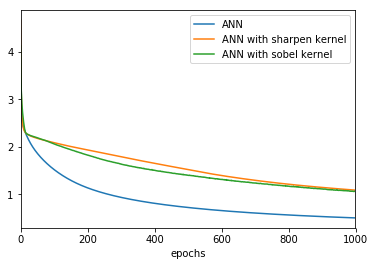

In [38]:
comparison = pd.concat([normal, 
                        simple.drop('epochs', axis=1), 
                        advance.drop('epochs', axis=1)], axis=1)
comparison.columns =['epochs', 'ANN', 
                     'ANN with sharpen kernel', 'ANN with sobel kernel']
comparison = comparison.set_index('epochs')
comparison.plot()